# Measuring the Speed of Light

In the late 1800s, Simon Newcomb performed a series of measurements of the speed of light. In this notebook, you will take his raw data and perform some simple analysis and visualization of this data using Pandas.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Raw data

Newcomb measured how long it took (in nanoseconds) for light to travel $7442$ meters. His raw measurements are reported as deviations from $24,800$ nanoseconds. Here is a file with the raw data. This comes from Stigler (1977).

In [2]:
offset = 24800 # add this to raw data to get times in nanoseconds
distance = 7442 # distance in meters traveled

In [67]:
%%writefile speed_of_light.txt
28 26 33 24 34 -44 27 16 40 -2
29 22 24 21 25 30 23 29 31 19
24 20 36 32 36 28 25 21 28 29
37 25 28 26 30 32 36 26 30 22
36 23 27 27 28 27 31 27 26 33
26 32 32 24 39 28 24 25 32 25
29 27 28 29 16 23

Overwriting speed_of_light.txt


## Reading the data

Read the raw data in as a Pandas `DataFrame`:

* Create a column named `raw` with integer valued deviations.
* Name the `DataFrame` `data`.

In [99]:
# YOUR CODE HERE
with open('speed_of_light.txt') as file:
    speeds = file.read().split()
data = pd.DataFrame({'raw': speeds}, columns=['raw'], dtype=int)

In [100]:
data.head()

,raw
0,28
1,26
2,33
3,24
4,34


In [101]:
assert list(data.columns)==['raw']
assert len(data)==66
assert data.raw.dtype==np.dtype(int)

## Transforming the data

Create two new columns in the `DataFrame`:

* A column named `time` that has the times in nanoseconds.
* A column named `speed` that has the speeds in meters/nanosecond.

In [102]:
# YOUR CODE HERE
data['time'] = data['raw'] + offset
data['speed'] = distance / data['time']

In [103]:
data.head()

,raw,time,speed
0,28,24828,0.299742
1,26,24826,0.299766
2,33,24833,0.299682
3,24,24824,0.299791
4,34,24834,0.299670


In [104]:
assert list(data.columns)==['raw', 'time', 'speed']
assert abs(data.time.mean()-24826.0)<1.0
assert abs(data.speed.mean()-0.3)<0.1
assert data.time.dtype==np.dtype(int)
assert data.speed.dtype==np.dtype(float)

## Visualization and outlier removal

Make an appropriately labeled (with units) `distplot` of the `time` data.

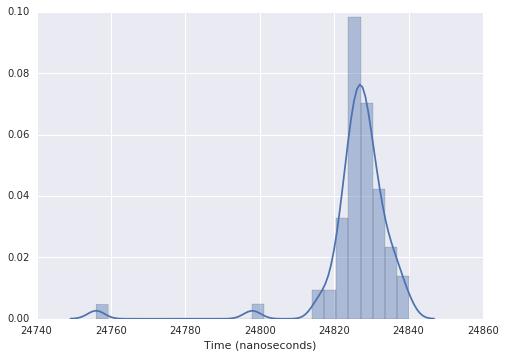

In [105]:
# YOUR CODE HERE
time_plot = sns.distplot(data['time'])
time_plot.set_xlabel('Time (nanoseconds)')

Make an appropriately labeled (with units) of the speed data:

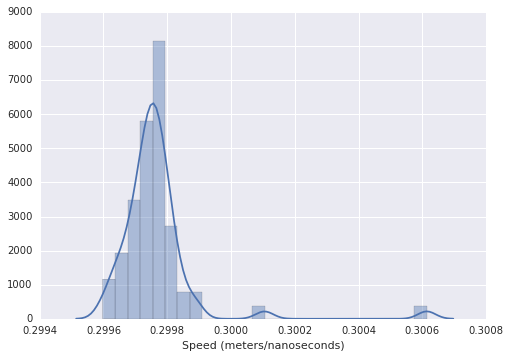

In [106]:
# YOUR CODE HERE
speed_plot = sns.distplot(data['speed'])
speed_plot.set_xlabel('Speed (meters/nanoseconds)')

Create a new `DataFrame` named `data2` that has the outliers removed:

In [114]:
# YOUR CODE HERE
describe = data.describe()
data2 = data[data['speed'] < 0.3]

Make an appropriately labeled (with units) of the speed data with outliers removed:

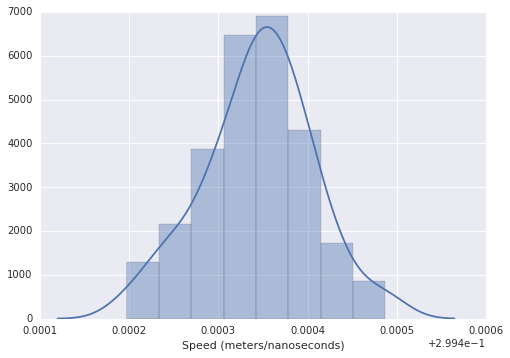

In [108]:
# YOUR CODE HERE
speed_plot = sns.distplot(data2['speed'])
speed_plot.set_xlabel('Speed (meters/nanoseconds)')

## Bootstrapped mean

Here is the actual speed of light in meters/nanoseconds:

In [109]:
actual = 299792458.0*1e-9

Compute the (`n=400`) bootstrapped distribution of the mean speed of light as a NumPy array named `means`. Use the `sample` method of the Pandas `Series/DataFrame` object to do this.

In [111]:
# YOUR CODE HERE
means = [np.mean(data2.sample(n=100, replace=True)['speed']) for i in range(400)]

Make an appropriately labeled `distplot` of the mean distribution that includes a vertical line where the actual speed of light is. Print the mean and 95% confidence interval of this distribution. Does this experiment agree with the actual speed of light?

Mean 0.299744851187 95 Confidence Interval 0.299732927342 0.299756854559


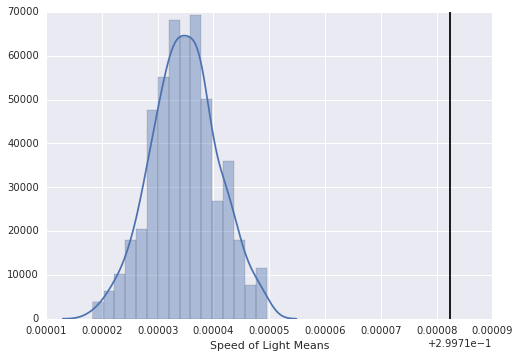

In [115]:
# YOUR CODE HERE
mean_plot = sns.distplot(means)
mean_plot.set_xlabel('Speed of Light Means')
plt.vlines(actual, 0, 70000)
print('Mean', np.mean(means), '95 Confidence Interval', np.percentile(means, 2.5), np.percentile(means, 97.5))

This experiment does not agree with the actual speed. The actual value is not in the confidence interval.